# Race Stats 

Runsingup lacks plots in there data. Median, mean are interesting but my favorite thing to see is a histogram 

The following is data pulled programatically from runsignup.com from the Madison Marathon 2022

URL to get some data https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=1000&search=#resultSetId-355216;perpage:2000 

Then for example, here is my histogram plot from the data: 


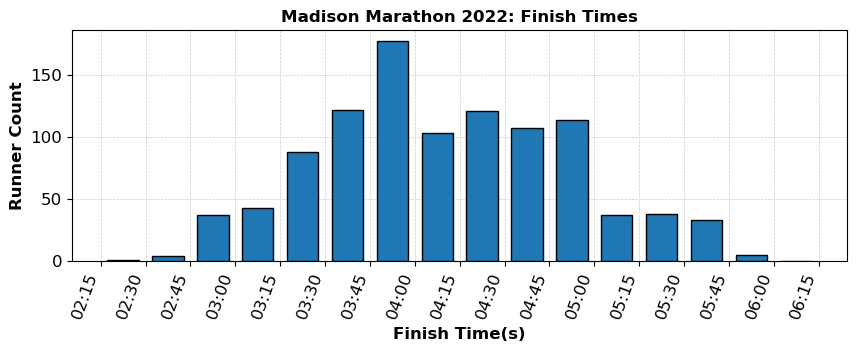

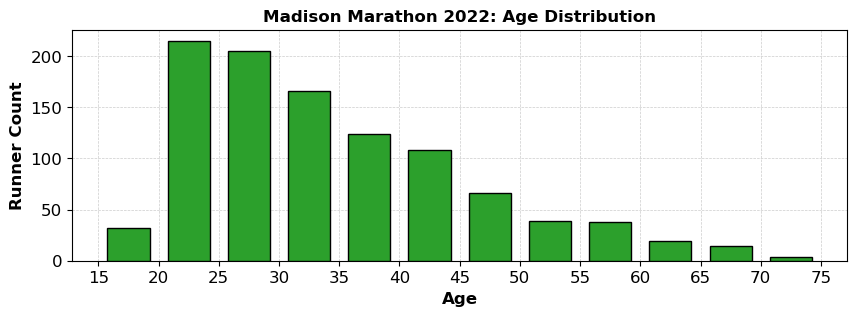

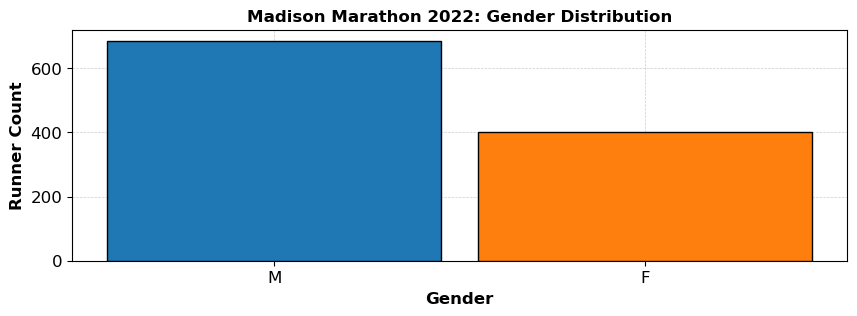

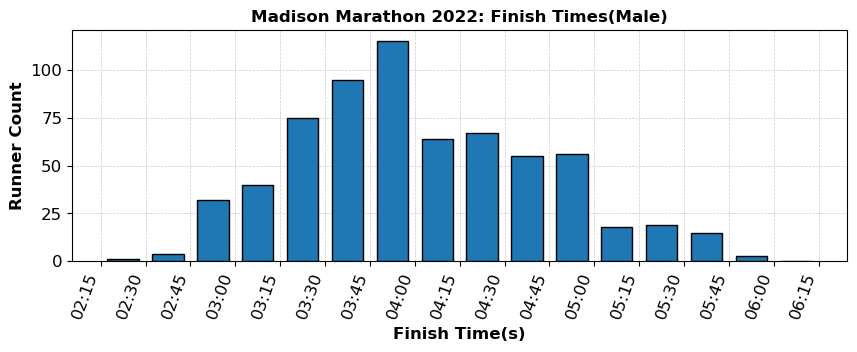

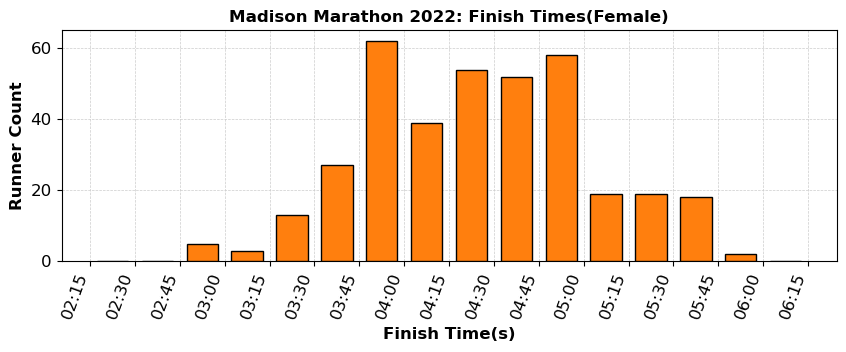

In [302]:
if 'fig_1' in globals(): display(fig_1)

if 'fig_race_age' in globals(): display(fig_race_age)

if 'fig_race_gender' in globals(): display(fig_race_gender)

if 'fig_male_finish' in globals(): display(fig_male_finish)

if 'fig_female_finish' in globals(): display(fig_female_finish)


In [303]:
# Import a bunch of libs 
import requests, json, os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['png']
import numpy as np
import matplotlib as matplotlib
import math
import pandas
from matplotlib import animation, rc
from IPython.display import HTML
from pandas import DataFrame
from numpy import genfromtxt
from IPython.display import display
from datetime import datetime, timedelta

# Set some plot defaults 

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['axes.titleweight'] = 'bold'

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)


In [304]:
# API pull data from runsignup

# uncomment the following to make the request, to be site friendly, this is commented out 
req_url = 'https://runsignup.com/Race/Results/26569/?resultSetId=355216&page=1&num=2000&search=#resultSetId-355216;perpage:2000' # 2022
#req_url = 'https://runsignup.com/Race/Results/26569/?search&resultSetId=289213&page=1&num=2000&search=' # 2021

running_data = requests.get(req_url,headers = {"Accept": "application/json"} )
running_data_json = json.loads(running_data.text)

# pull from saved
# file1 = open("data/madison_full_m_2022.json", "r+")
# running_data_json = json.loads(file1.read())

race_name = 'Madison Marathon 2022: '
run_data = np.array(running_data_json['resultSet']['results'])

In [305]:
#create create a backup of the data for no doubt, the API will be broken tomorrow

# data_path = './data'
# if not os.path.exists(data_path): # ensure export folder exists
#     os.makedirs(data_path)
# file_path = data_path + '/running_data.json'
# with open(file_path, 'w') as f:
#     f.write(running_data.text)


In [306]:
# get headers
running_headers = []
for i in range(len(running_data_json['headings'])):
    running_headers.append(running_data_json['headings'][i]['key'])
running_headers;

In [307]:
# parse data 
# convert strings such as '2:24:55.27' to datetime

finish_times = []
finish_times_M = []
finish_times_F = []
race_age = []
for i in range(len(run_data)):
    try:
        finish_times.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
        race_age.append(int(run_data[:,running_headers.index('age')][i]))
        if run_data[:,running_headers.index('gender')][i] == 'F':
            finish_times_F.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
        else:
            finish_times_M.append(datetime.strptime(run_data[:,running_headers.index('chip_time')][i],"%H:%M:%S.%f"))
    except:
        0

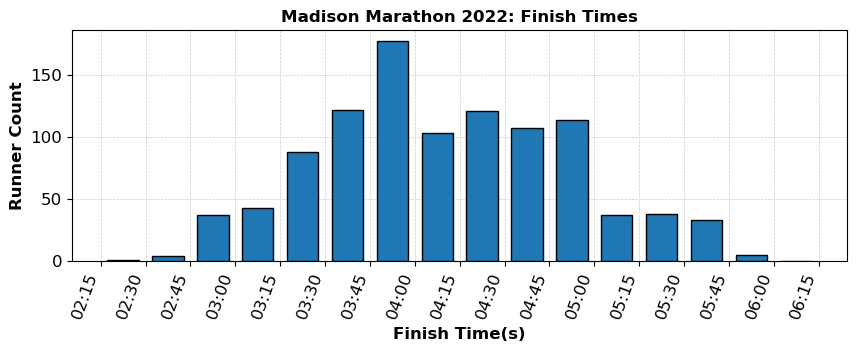

In [308]:
# generate some plots 

fig_1,ax1 = plt.subplots()

# Get nices bins 
time_start = datetime.strptime('2:15',"%H:%M")
my_bins = []
for i in range(17):
    my_bins.append(time_start + timedelta(minutes=i*15))

ax1.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
ax1.hist(finish_times, bins=my_bins, ec="black", rwidth=0.7, zorder=3) # times & bins
xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
ax1.xaxis.set_major_formatter(xfmt) # apply label format 
fig_1.set_size_inches(10,3); # figure size 
plt.xticks(rotation=70, ha='right');
plt.xticks(my_bins);
plt.ylabel('Runner Count')
plt.xlabel('Finish Time(s)');
plt.title(race_name +'Finish Times');

Note, quite a few more interesting plots could be made by sepperating data by the provided headers:

In [309]:
running_headers

['race_placement',
 'bib_num',
 'name',
 'gender',
 'field_274839',
 'age',
 'age_performance_percentage',
 'division_place',
 'division',
 'city',
 'state',
 'split_417802',
 'split_417802_pace',
 'split_417803',
 'split_417803_pace',
 'split_417804',
 'split_417804_pace',
 'split_417805',
 'split_417805_pace',
 'clock_time',
 'chip_time',
 'avg_pace',
 'countrycode',
 'profile_image_url']

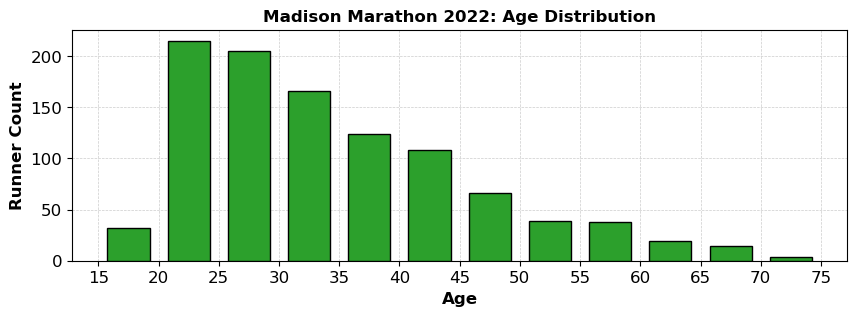

In [310]:
my_bins = []
for i in range(13):
    my_bins.append(15 + i*5)
fig_race_age,ax2 = plt.subplots()
n,bins,patches = ax2.hist(race_age, ec="black", bins=my_bins, rwidth=0.7,zorder=3, color = plt.cm.tab10.colors[2]) # times & bins
plt.xticks(np.array(bins).astype(np.int32));
ax2.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
fig_race_age.set_size_inches(10,3); # figure size 
plt.ylabel('Runner Count')
plt.xlabel('Age');
plt.title(race_name + 'Age Distribution');

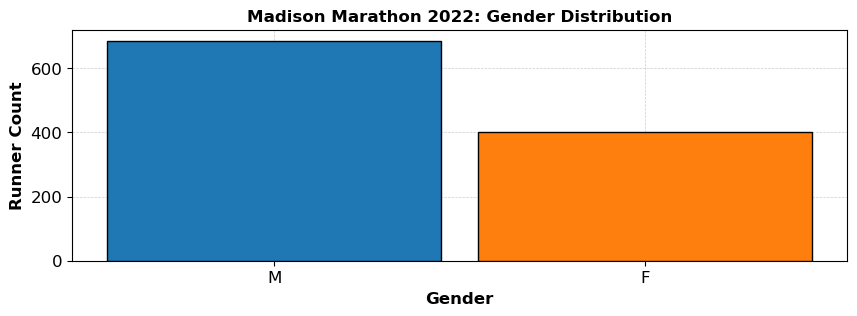

In [311]:
fig_race_gender,ax3 = plt.subplots()
n,bins,patches = ax3.hist(run_data[:,running_headers.index('gender')], bins=['M','F',""], rwidth=0.9,ec="black",zorder=3) # times & bins
ax3.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
fig_race_gender.set_size_inches(10,3); # figure size 
patches[0].set_facecolor(plt.cm.tab10.colors[0])
patches[1].set_facecolor(plt.cm.tab10.colors[1])
plt.ylabel('Runner Count')
plt.xlabel('Gender');
plt.xticks([0.5,1.5],['M','F']);
plt.title(race_name + 'Gender Distribution');

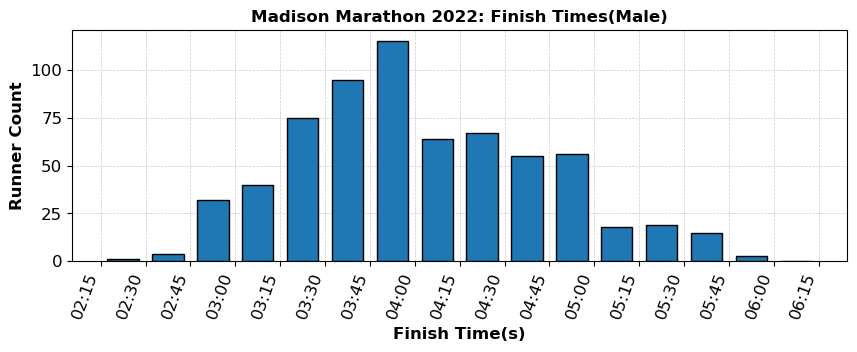

In [312]:
fig_male_finish,ax4 = plt.subplots()

# Get nices bins 
time_start = datetime.strptime('2:15',"%H:%M")
my_bins = []
for i in range(17):
    my_bins.append(time_start + timedelta(minutes=i*15))

ax4.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
ax4.hist(finish_times_M, bins=my_bins, ec="black", rwidth=0.7, zorder=3) # times & bins
xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
ax4.xaxis.set_major_formatter(xfmt) # apply label format 
fig_male_finish.set_size_inches(10,3); # figure size 
plt.xticks(rotation=70, ha='right');
plt.xticks(my_bins);
plt.ylabel('Runner Count')
plt.xlabel('Finish Time(s)');
plt.title(race_name + 'Finish Times(Male)');

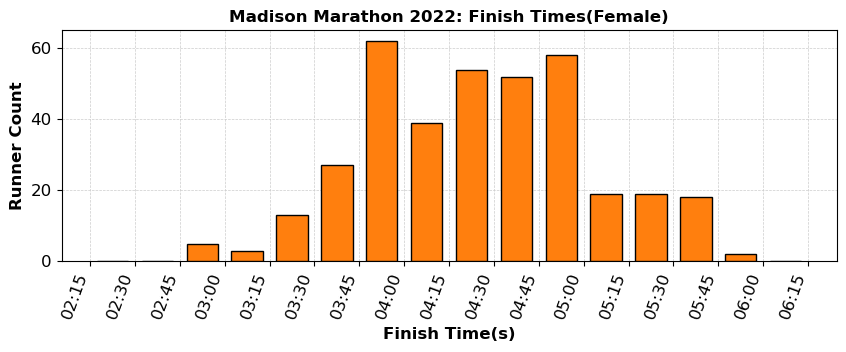

In [313]:
fig_female_finish,ax5 = plt.subplots()

time_start = datetime.strptime('2:15',"%H:%M")
my_bins = []
for i in range(17):
    my_bins.append(time_start + timedelta(minutes=i*15))

ax5.grid(color='0.8', linestyle='--', linewidth=0.5, zorder=0) # Grid
ax5.hist(finish_times_F, bins=my_bins, ec="black", rwidth=0.7, zorder=3, color=plt.cm.tab10.colors[1]) # times & bins
xfmt = matplotlib.dates.DateFormatter('%H:%M') # clean time labels 
ax5.xaxis.set_major_formatter(xfmt) # apply label format 
fig_female_finish.set_size_inches(10,3); # figure size 
plt.xticks(rotation=70, ha='right');
plt.xticks(my_bins);
plt.ylabel('Runner Count')
plt.xlabel('Finish Time(s)');
plt.title(race_name + 'Finish Times(Female)');

In [314]:
len(finish_times_M)

659